# El perceptrón de Rosenblatt
Un **perceptrón** es un tipo de neurona artificial. Este suma las entradas para computar un valor intermedio $z$, el cual alimenta a una **función de activación**. El perceptrón usa la **función signo** como función de activación, pero otras redes neuronales artificiales usan otras funciones.

De esta forma, el perceptrón tiene como salida $-1$ si la suma ponderada es menor a cero, y en caso contrario, tiene como salida $1$. Escrito como una ecuación, se tiene:
$$ y = f(z) ,\text{ donde} \\
 z = \sum_{i=0}^{n} w_i x_i \\
 f = \left\{\begin{matrix}
 -1, \; z <0 & \\ 
 1, \; z \ge 0& 
\end{matrix}\right. \\
x_0 = 1 \text{(bias)}
$$

## Implementación del perceptrón con Python

In [4]:
# El primer elemento en el vector x debe ser 1.
# La longitud de w y x debe ser n+1 para una neurona con n entradas
def compute_output(w,x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # suma ponderada de las entradas

    if z < 0: # función de activación
        return -1
    else:
        return 1

### Ejemplo con un perceptrón de dos entradas
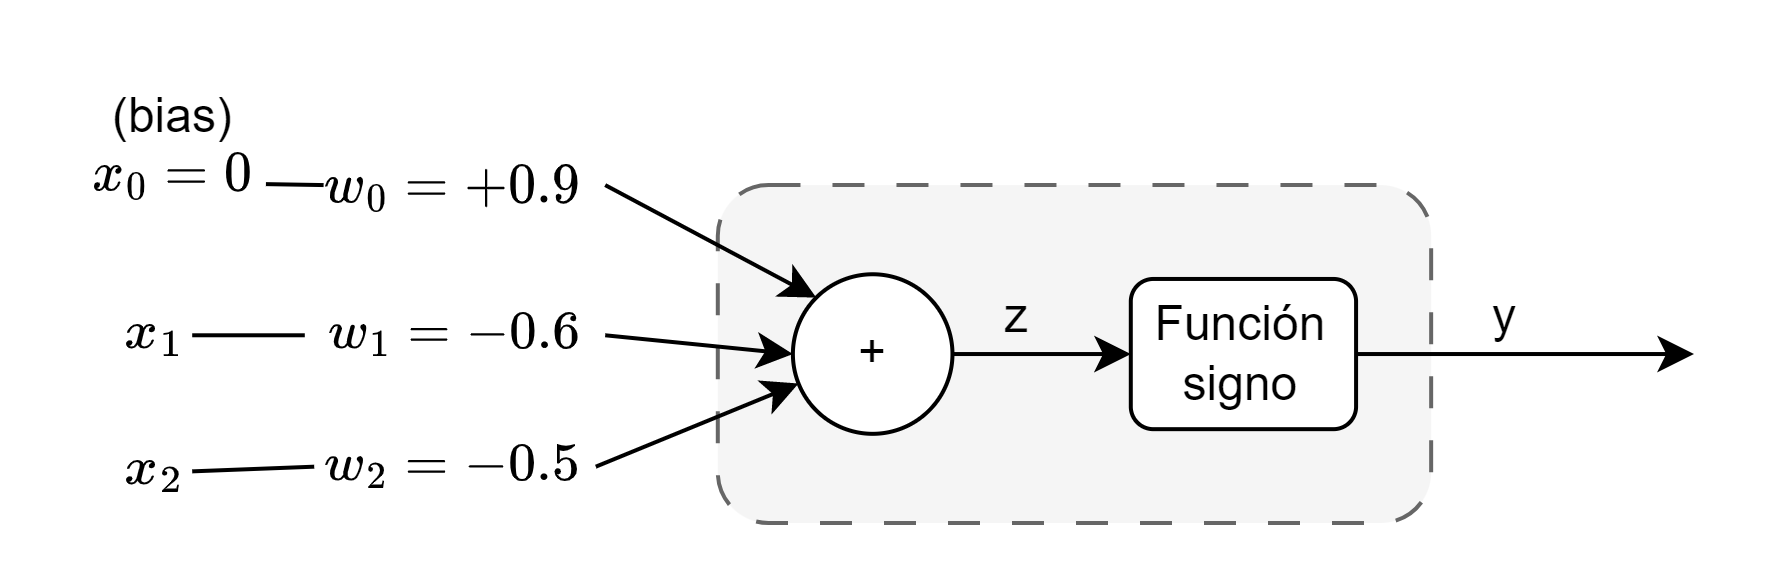
Para conocer el output de las diferentes combinaciones de entradas, utilizo la función definida anteriormente

In [5]:
# False, False --> True
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, -1.0])

1

In [6]:
# False, True --> True
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, 1.0])

1

In [7]:
# True, False --> True
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, -1.0])

1

In [8]:
# True, True --> False
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, 1.0])

-1

## Algoritmo de aprendizaje del perceptrón
El algoritmo de aprendizaje del perceptrón es lo que se llama *algoritmo de entrenamiento supervizado*. La palabra supervizado implica que el modelo que se está entrenando se presenta con los datos de entrada y con los resultados deseados *(ground truth)*. 

El algoritmo funciona de la siguiente manera:
1. Se inicializan los pesos aleatoriamente
2. Se selecciona un par entrada/salida aleatoriamente
3. Se presentan los valores $x_1, x_2, ..., x_n$ al perceptrón para obtener la salida $y$
4. Si la salida $y$ es diferente a la salida esperada para ese par entrada/salida, ajustar los pesos de la siguiente manera:
    - Si $y < 0$, sumar $\eta x$ a cada $x$
    - Si $y > 0$, restar $\eta x$ a cada $x$
5. Repetir los pasos 2, 3 y 4 hasta que el perceptron prediga todos los ejemplos correctamente

El perceptrón tiene ciertas limitaciones, por lo que para ciertos pares entrada/salida el algoritmo no converge.
La constante arbitraria $\eta$ se conoce como tasa de aprendizaje (*learning rate*) y puede ser seteada en $1.0$, pero modificano este valor puede que se obtenga más rápido la convergencia del algoritmo. 

In [16]:
import random 

def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =','%5.2f' % w[1], ', w2 =','%5.2f' % w[2])

# Definición de variables necesarias para controlar el proceso de entrenamiento
random.seed(7) # Para hacerlo repetible
LEARNING_RATE = 0.1
index_list = [0,1,2,3] # Se usa para randomizar el orden

# Definir los ejemplos de entrenamiento
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),(1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] #Entradas
y_train = [1.0, 1.0, 1.0, -1.0] #Salidas esperadas

# Definir los pesos del perceptroón
w = [0.2, -0.6, 0.25] # Inicializar en numeros arbitrarios

# Mostrar pesos iniciales
show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


En la siguiente función, el ajuste del peso es un poco diferente al que se describe en el algoritmo: en lugar de usar un if para determinar si se usa la suma o la resta para ajustar el peso, el valor de ajuste se multiplica por $y$. El valor de $y$ va a ser o -1 o +1, y por lo tando indica el signo de la operación.

In [20]:
# Entrenamiento del perceptrón
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) #orden aleatorio
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) #funcion del perceptron

        if y != p_out: #Actualizar pesos cuando no es correcto
            for j in range(0,len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w)

El perceptron divide el espacio 2D en dos regiones separadas por una línea recta, donde todas las entradas de un lado de la línea producen una salida = -1 y todas las entradas del otro lado de la línea producen una salida = 1. 
Esta línea límite está dada por los puntos en donde la suma ponderada de las entradas es 0, porque la función signo cambia cuando la entrada es 0. 
Por lo tanto se tiene:
$$w_0x_0 + w_1x_1+w_2x_2 = 0$$ 

Y reescribiendo la función para que $x_2$ sea función de $x_1$:
$$ x_2 = -\frac{w_1}{w_2}x1-\frac{w_0}{w_2}$$

De esta forma se tiene una línea recta con un pandiente de $\frac{-w_1}{w_2}$ que intercepta al eje y en $\frac{-w_0}{w_2}$

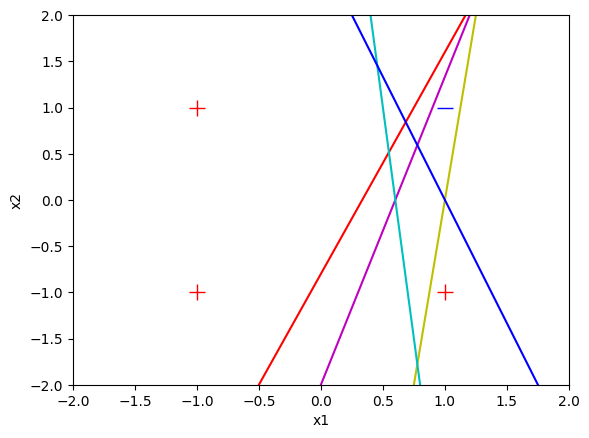

In [37]:
import matplotlib.pyplot as plt
import random 

#Variables para gráfico
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    if color_index == 0:
        plt.plot([1.0], [1.0], 'b_', markersize=12)
        plt.plot([-1.0, -1.0, 1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')

    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)), -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]), -w[1]/w[2]*(2.0)+(-w[0]/w[2])]

    plt.plot(x, y, color_list[color_index])        
    if color_index < (len(color_list) - 1):
        color_index += 1


random.seed(7)
LEARNING_RATE = 0.1
index_list = [0,1,2,3] 
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),(1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] 
y_train = [1.0, 1.0, 1.0, -1.0] 
w = [0.2, -0.6, 0.25] 
show_learning(w)

# Entrenamiento del perceptrón
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list)
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)

        if y != p_out: 
            for j in range(0,len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w)


En el gráfico anteriór pueden verse las líneas que se van generando en el entrenamiento, hasta llegar a la que divide a los + de los - (línea azul).

## Limitaciones del perceptrón
Observando lo anterior, se puede notar que el perceptrón está limitado a los casos en donde los datos puedan separarse por una línea recta. 

En el caso de la función XOR (OR exclusiva), el algoritmo nunca converge:
| X1    | X2    | Y     |
|-------|-------|-------|
| False | False | False |
| True  | False | True  |
| False | True  | True  |
| True  | True  | False |

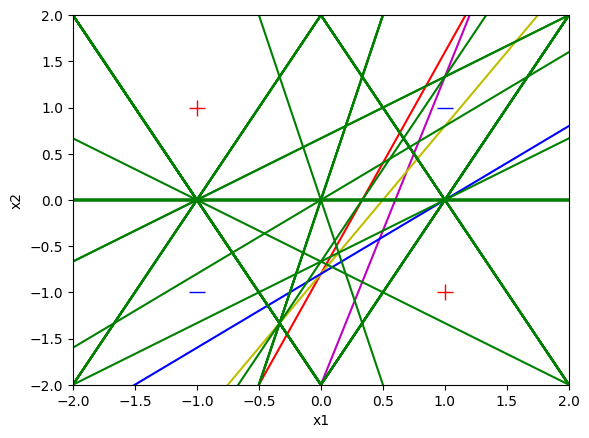

In [43]:
import matplotlib.pyplot as plt
import random 

#Variables para gráfico
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

def show_learning(w):
    global color_index
    if color_index == 0:
        plt.plot([1.0, -1.0], [1.0, -1.0], 'b_', markersize=12)
        plt.plot([-1.0, 1.0], [1.0, -1.0], 'r+', markersize=12)
        plt.axis([-2, 2, -2, 2])
        plt.xlabel('x1')
        plt.ylabel('x2')

    x = [-2.0, 2.0]
    if abs(w[2]) < 1e-5:
        y = [-w[1]/(1e-5)*(-2.0)+(-w[0]/(1e-5)), -w[1]/(1e-5)*(2.0)+(-w[0]/(1e-5))]
    else:
        y = [-w[1]/w[2]*(-2.0)+(-w[0]/w[2]), -w[1]/w[2]*(2.0)+(-w[0]/w[2])]

    plt.plot(x, y, color_list[color_index])        
    if color_index < (len(color_list) - 1):
        color_index += 1


random.seed(7)
LEARNING_RATE = 0.1
index_list = [0,1,2,3] 
x_train = [(1.0, -1.0, -1.0), (1.0, 1.0, -1.0),(1.0, -1.0, 1.0), (1.0, 1.0, 1.0)] 
y_train = [-1.0, 1.0, 1.0, -1.0] 
w = [0.2, -0.6, 0.25] 
show_learning(w)

# Entrenamiento del perceptrón
# Dado que es infinito, seteo un numero arbitrario de intentos
for i in range(30):
    all_correct = True
    random.shuffle(index_list)
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x)

        if y != p_out: 
            for j in range(0,len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            show_learning(w)


Como se ve en el gráfico, no existe una línea recta que pueda dividir los - de los +. 
Esta es una de las principales limitaciones del perceptrón: **puede resolver problemas de clasificación sólo si las clases son linealmente independientes**, lo que en dos dimensiones significa que los datapoints pueden separase por una línea recta.

## Combinando múltiples perceptrones
Para solucionar el problema del perceptrón, una solución es unir 2 o más perceptrones, de forma que el espacio quede dividido entre 2 o más líneas rectas simultáneas. 
| X0 |    X1    |    X2    |  Y0  |  Y1  |     Y2     |
|:--:|:--------:|:--------:|:----:|:----:|:----------:|
|  1 | -1 False | -1 False |  1.0 | -1.0 | -1.0 False |
|  1 |  1 True  | -1 False |  1.0 |  1.0 |  1.0 True  |
|  1 | -1 False |  1 True  |  1.0 |  1.0 |  1.0 True  |
|  1 |  1 True  |  1 True  | -1.0 |  1.0 | -1.0 False |

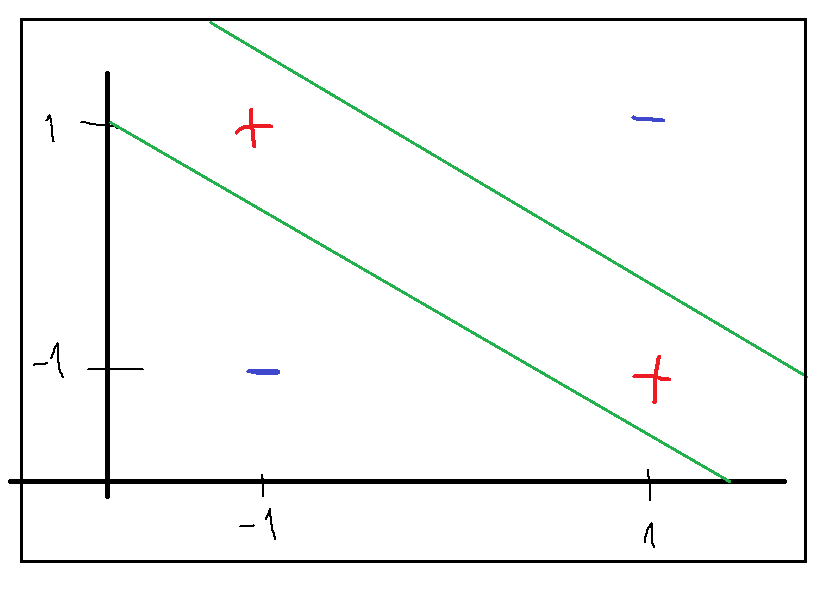

Este ejemplo es uno de los ejemplos más símples de una red fully connected, la cual tiene las siguientes características:
- En una red **fully connected**, la neurona en una capa recibe las entradas de todas las otras neuronas de la capa anterior inmediata. 
- Una **feedforward network** no tiene ciclos
- La **capa de entrada** no tiene neuronas
- La salida de las neuronas en una **capa oculta** no es visible fuera de la red. 
- La **capa de salida** puede tener múltiples neuronas


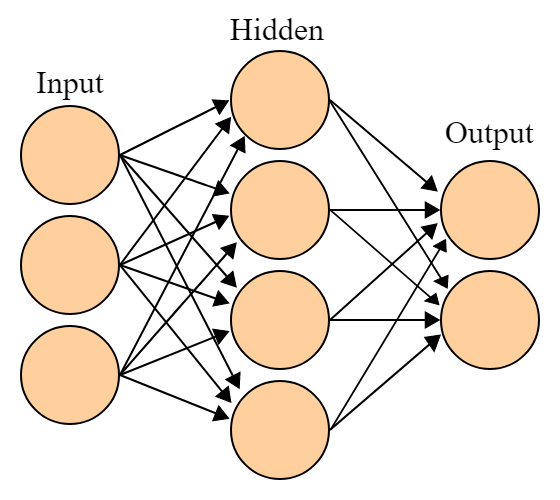